In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline 

In [107]:
fwdf = pd.read_csv('C:\\Users\\siva_\\Documents\\MISY630\\Research Project\\Examples\\log2.csv')
print(fwdf.shape)
print(fwdf.dropna().shape)

(65532, 12)
(65532, 12)


In [108]:
fwdf.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [109]:
fwdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Source Port,65532.0,49391.969343,1.525571e+04,0.0,49183.0,53776.5,58638.00,6.553400e+04
Destination Port,65532.0,10577.385812,1.846603e+04,0.0,80.0,445.0,15000.00,6.553500e+04
NAT Source Port,65532.0,19282.972761,2.197069e+04,0.0,0.0,8820.5,38366.25,6.553500e+04
NAT Destination Port,65532.0,2671.049930,9.739162e+03,0.0,0.0,53.0,443.00,6.553500e+04
Bytes,65532.0,97123.950085,5.618439e+06,60.0,66.0,168.0,752.25,1.269359e+09
Bytes Sent,65532.0,22385.796908,3.828139e+06,60.0,66.0,90.0,210.00,9.484772e+08
Bytes Received,65532.0,74738.153177,2.463208e+06,0.0,0.0,79.0,449.00,3.208818e+08
Packets,65532.0,102.866035,5.133002e+03,1.0,1.0,2.0,6.00,1.036116e+06
Elapsed Time (sec),65532.0,65.833577,3.024618e+02,0.0,0.0,15.0,30.00,1.082400e+04
pkts_sent,65532.0,41.399530,3.218871e+03,1.0,1.0,1.0,3.00,7.475200e+05


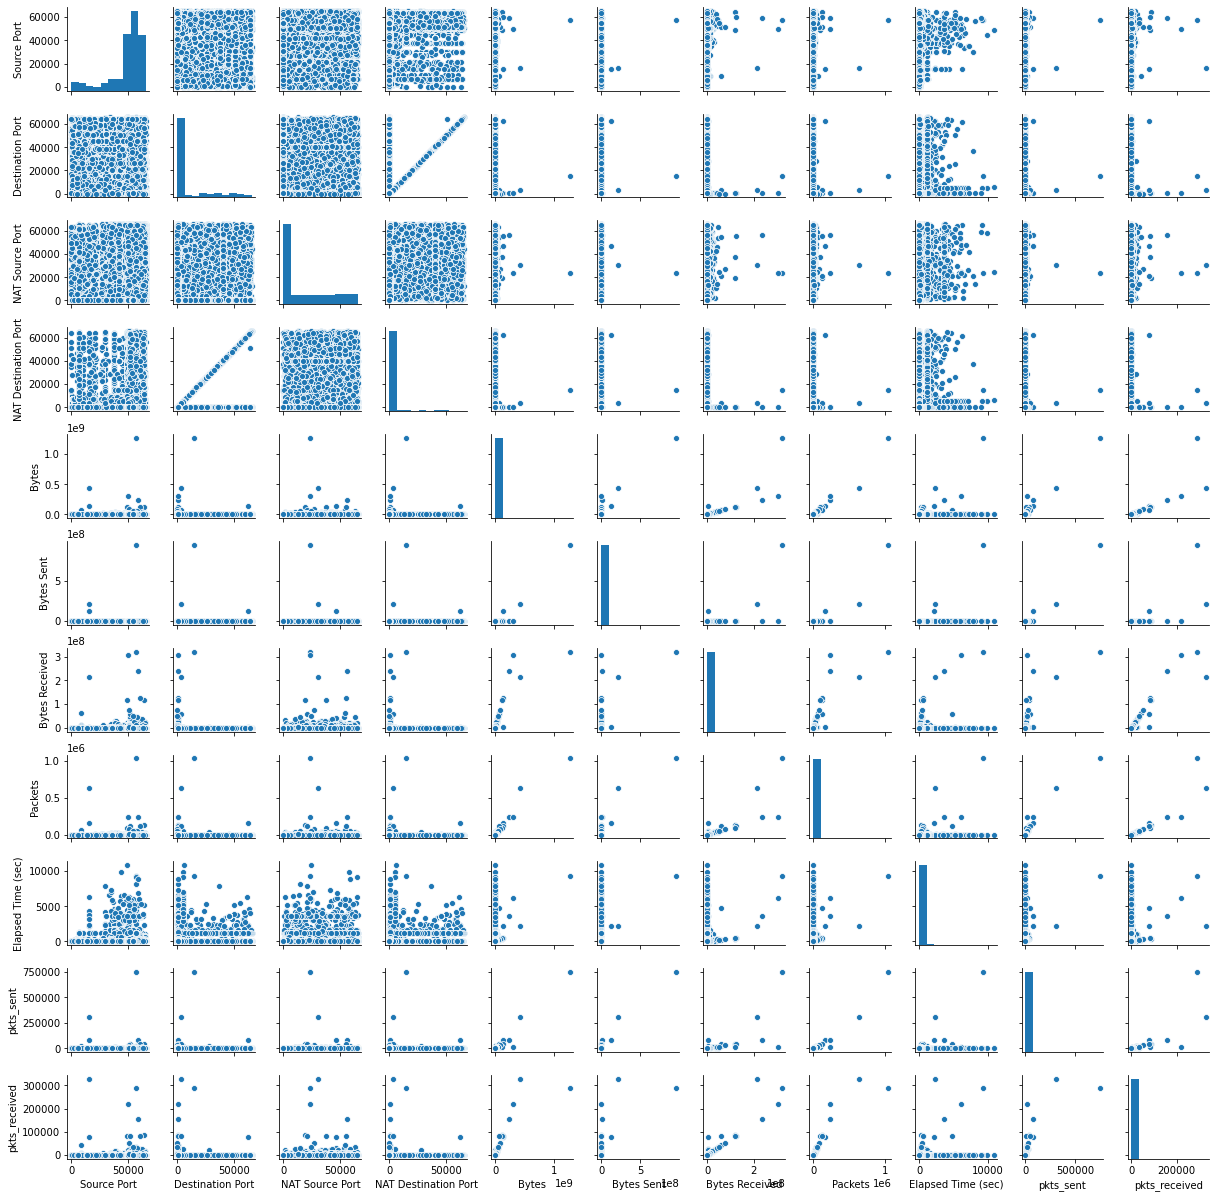

In [110]:
sns.pairplot(fwdf[['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received']], height=1.5)

In [111]:
fwdf['Source Port'].groupby(fwdf['Elapsed Time (sec)']).describe()

,count,mean,std,min,25%,50%,75%,max
Elapsed Time (sec),,,,,,,,
0,28265.0,46953.165257,18402.492005,0.0,43461.00,53799.0,59055.0,65533.0
1,41.0,47064.097561,13980.384159,9144.0,49370.00,53862.0,53872.0,64022.0
2,4.0,42517.500000,12650.220380,27005.0,34940.00,44288.0,51865.5,54489.0
3,1.0,57499.000000,NaN,57499.0,57499.00,57499.0,57499.0,57499.0
4,370.0,54040.008108,8590.334325,22.0,52058.25,53735.5,58638.0,64098.0
...,...,...,...,...,...,...,...,...
8912,1.0,59314.000000,NaN,59314.0,59314.00,59314.0,59314.0,59314.0
9115,1.0,57239.000000,NaN,57239.0,57239.00,57239.0,57239.0,57239.0
9283,1.0,57235.000000,NaN,57235.0,57235.00,57235.0,57235.0,57235.0


In [112]:
fwdf.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [113]:
fwdf['Source Port'].groupby(fwdf['Action']).describe()

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,51127.933103,12215.084883,0.0,49418.0,53759.0,57369.25,65534.0
deny,14987.0,38557.289317,21098.611314,0.0,18754.0,46573.0,57355.50,65529.0
drop,12851.0,57038.209244,4788.365511,49156.0,52797.0,56846.0,61195.00,65533.0
reset-both,54.0,26722.425926,18382.095784,1024.0,11573.5,22207.5,40013.50,64461.0


In [114]:
fwdf['Destination Port'].groupby(fwdf['Action']).describe()

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,4728.336265,12573.742340,0.0,53.0,80.0,443.0,65535.0
deny,14987.0,33904.072129,19337.312430,0.0,22114.0,35440.0,50584.0,65504.0
drop,12851.0,445.000000,0.000000,445.0,445.0,445.0,445.0,445.0
reset-both,54.0,24882.333333,18531.926996,1.0,5618.0,25773.0,34021.0,61248.0


In [115]:
fwdf['NAT Source Port'].groupby(fwdf['Action']).describe()

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,33549.797689,19004.048999,0.0,17050.25,33999.5,50341.25,65535.0
deny,14987.0,31.828184,1269.390081,0.0,0.00,0.0,0.00,62347.0
drop,12851.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
reset-both,54.0,6673.648148,15236.959303,0.0,0.00,0.0,0.00,64014.0


In [116]:
fwdf['NAT Destination Port'].groupby(fwdf['Action']).describe()

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,4648.409724,12487.696166,0.0,53.0,80.0,443.0,65535.0
deny,14987.0,2.164142,132.690631,0.0,0.0,0.0,0.0,8889.0
drop,12851.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
reset-both,54.0,753.111111,1422.171667,0.0,0.0,0.0,0.0,3389.0


In [117]:
fwdf['Bytes'].groupby(fwdf['Action']).describe()

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,169037.953241,7.412625e+06,60.0,194.00,422.0,5166.0,1.269359e+09
deny,14987.0,83.211717,8.857610e+01,60.0,62.00,66.0,66.0,1.850000e+03
drop,12851.0,68.675278,1.882625e+00,66.0,66.00,70.0,70.0,7.000000e+01
reset-both,54.0,157.351852,8.132399e+01,62.0,88.75,145.0,158.5,2.930000e+02


In [118]:
fwdf['Bytes Sent'].groupby(fwdf['Action']).describe()

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,38917.411743,5.051107e+06,60.0,94.00,126.0,1586.0,948477220.0
deny,14987.0,83.036098,8.731427e+01,60.0,62.00,66.0,66.0,1514.0
drop,12851.0,68.675278,1.882625e+00,66.0,66.00,70.0,70.0,70.0
reset-both,54.0,141.796296,5.636216e+01,62.0,88.75,145.0,158.5,223.0


In [119]:
fwdf['Bytes Received'].groupby(fwdf['Action']).describe()

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,130120.541498,3.249056e+06,0.0,91.0,220.0,3063.25,320881795.0
deny,14987.0,0.175619,1.218171e+01,0.0,0.0,0.0,0.00,1419.0
drop,12851.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.00,0.0
reset-both,54.0,15.555556,2.937504e+01,0.0,0.0,0.0,0.00,70.0


In [120]:
fwdf['Packets'].groupby(fwdf['Action']).describe()

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,178.348565,6771.929736,1.0,2.0,3.0,19.0,1036116.0
deny,14987.0,1.003270,0.083641,1.0,1.0,1.0,1.0,5.0
drop,12851.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
reset-both,54.0,1.666667,1.258930,1.0,1.0,1.0,1.0,4.0


In [121]:
fwdf['Elapsed Time (sec)'].groupby(fwdf['Action']).describe()

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,114.617349,392.025709,0.0,27.0,30.0,49.0,10824.0
deny,14987.0,0.000133,0.011552,0.0,0.0,0.0,0.0,1.0
drop,12851.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
reset-both,54.0,0.129630,0.339050,0.0,0.0,0.0,0.0,1.0


In [122]:
fwdf['pkts_sent'].groupby(fwdf['Action']).describe()

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,71.334883,4247.003549,1.0,1.0,2.0,10.0,747520.0
deny,14987.0,1.002202,0.049640,1.0,1.0,1.0,1.0,3.0
drop,12851.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
reset-both,54.0,1.444444,0.839287,1.0,1.0,1.0,1.0,3.0


In [123]:
fwdf['pkts_received'].groupby(fwdf['Action']).describe()

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,107.013682,2932.822053,0.0,1.0,1.0,9.0,327208.0
deny,14987.0,0.001068,0.046197,0.0,0.0,0.0,0.0,2.0
drop,12851.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
reset-both,54.0,0.222222,0.419643,0.0,0.0,0.0,0.0,1.0


(array([37640.,     0.,     0., 14987.,     0.,     0., 12851.,     0.,
            0.,    54.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

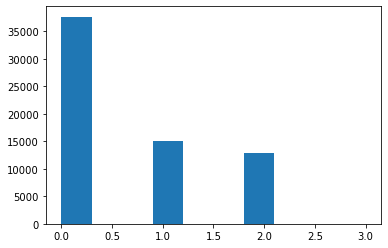

In [124]:
fwdf['classenc'] = le.fit_transform(fwdf.Action)
fwdf.describe().transpose()
plt.hist(fwdf['classenc'])

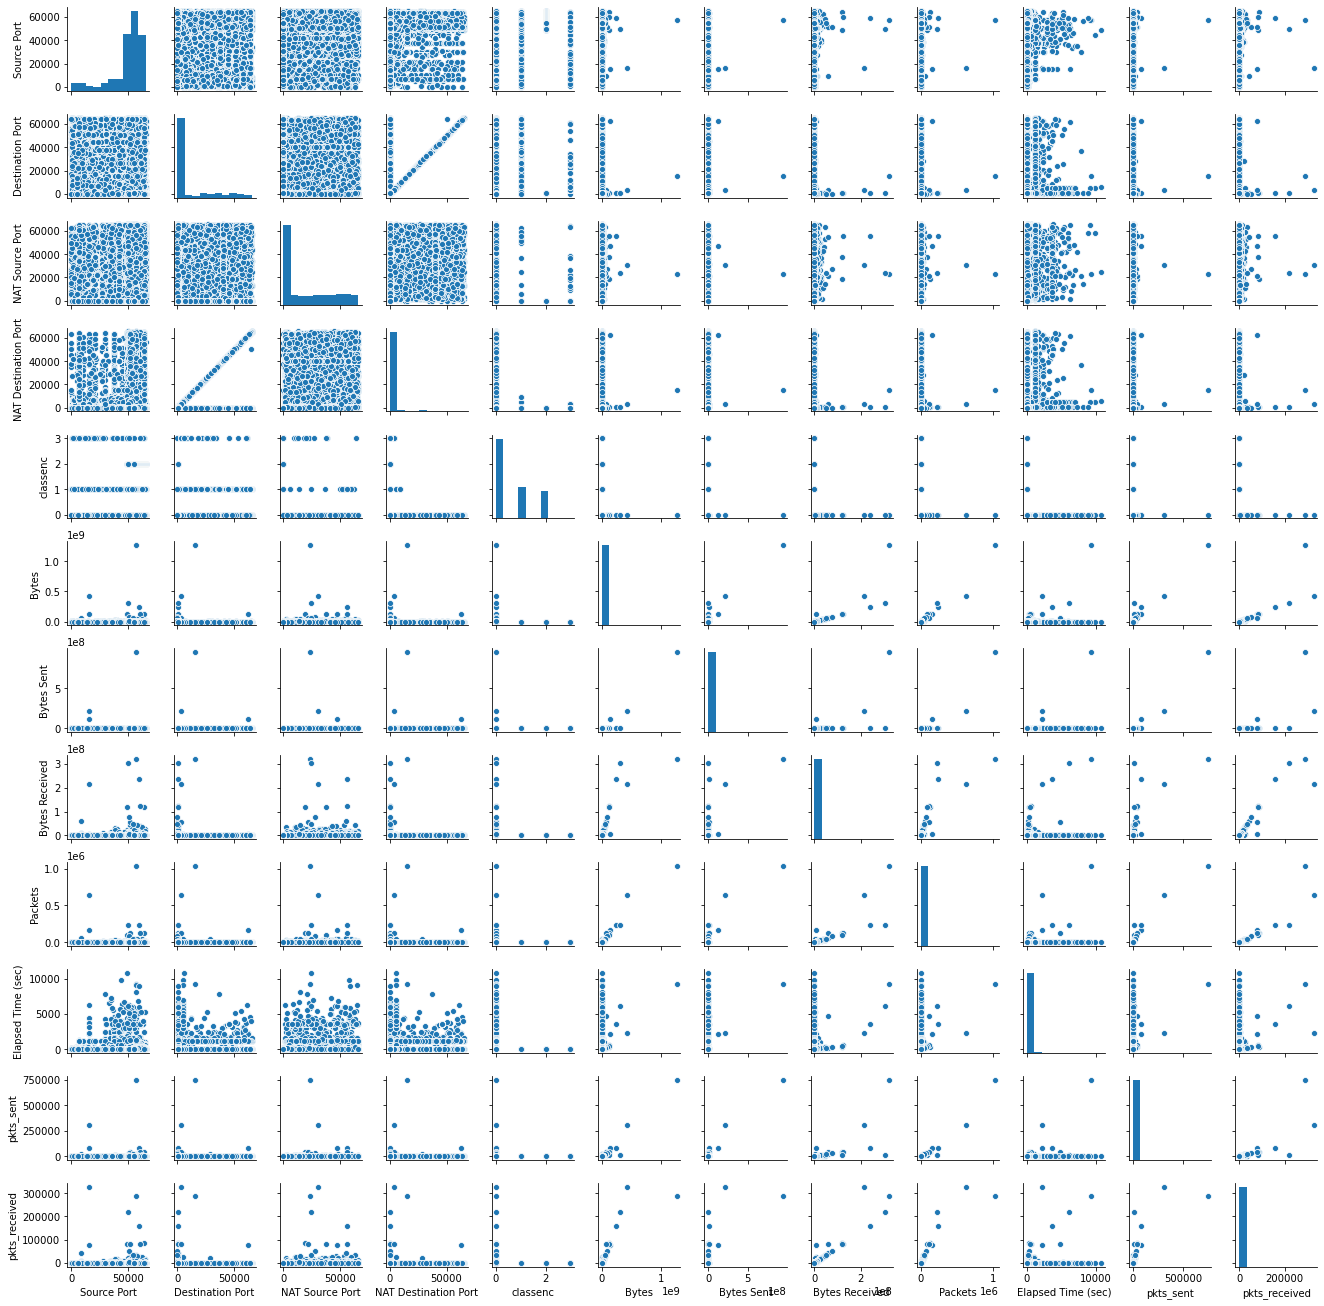

In [125]:
fwdf.groupby(fwdf['classenc']).describe()
sns.pairplot(fwdf[['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'classenc', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received']], height=1.5)

In [126]:
fwdf['classenc'].value_counts()

0    37640
1    14987
2    12851
3       54
Name: classenc, dtype: int64

In [127]:
fwdf['classenc'].groupby(fwdf['Source Port']).describe()

,count,mean,std,min,25%,50%,75%,max
Source Port,,,,,,,,
0,173.0,0.508671,0.501376,0.0,0.00,1.0,1.00,1.0
5,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
20,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
22,4.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
25,2.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...
65530,9.0,0.222222,0.666667,0.0,0.00,0.0,0.00,2.0
65531,2.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
65532,3.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [128]:
 tmp = fwdf.copy()
# tmp = fwdf.loc[fwdf.classenc == 1.0].copy()
# tmp = tmp[['Source Port', 'Destination Port', 'NAT Source Port',
#        'NAT Destination Port', 'Bytes', 'Bytes Sent',
#        'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
#        'pkts_received', 'classenc']]
print(tmp.columns)
tmp.groupby(tmp['classenc']).describe()

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received', 'classenc'],
      dtype='object')


Source Port                                                         \
               count          mean           std      min      25%      50%   
classenc                                                                      
0            37640.0  51127.933103  12215.084883      0.0  49418.0  53759.0   
1            14987.0  38557.289317  21098.611314      0.0  18754.0  46573.0   
2            12851.0  57038.209244   4788.365511  49156.0  52797.0  56846.0   
3               54.0  26722.425926  18382.095784   1024.0  11573.5  22207.5   

                            Destination Port                ... pkts_sent  \
               75%      max            count          mean  ...       75%   
classenc                                                    ...             
0         57369.25  65534.0          37640.0   4728.336265  ...      10.0   
1         57355.50  65529.0          14987.0  33904.072129  ...       1.0   
2         61195.00  65533.0          12851.0    445.000000  ...       1.0   
3         40013.50  64461.0             54.0  24882.333333  ...       1.0   

                   pkts_received                                               \
               max         count        mean          std  min  25%  50%  75%   
classenc                                                                        
0         747520.0       37640.0  107.013682  2932.822053  0.0  1.0  1.0  9.0   
1              3.0       14987.0    0.001068     0.046197  0.0  0.0  0.0  0.0   
2              1.0       12851.0    0.000000     0.000000  0.0  0.0  0.0  0.0   
3              3.0          54.0    0.222222     0.419643  0.0  0.0  0.0  0.0   

                    
               max  
classenc            
0         327208.0  
1              2.0  
2              0.0  
3              1.0  

[4 rows x 88 columns]

In [129]:
tmp.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received', 'classenc'],
      dtype='object')

In [130]:
tmp['classenc'].groupby(tmp['Source Port']).describe()

,count,mean,std,min,25%,50%,75%,max
Source Port,,,,,,,,
0,173.0,0.508671,0.501376,0.0,0.00,1.0,1.00,1.0
5,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
20,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
22,4.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
25,2.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...
65530,9.0,0.222222,0.666667,0.0,0.00,0.0,0.00,2.0
65531,2.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
65532,3.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [131]:
# Start simple
y = tmp['classenc']
X = tmp[['Source Port','Destination Port']]
# Counts for those who do not have diabetes (y=0) and those who do (y=1)
y.value_counts()

0    37640
1    14987
2    12851
3       54
Name: classenc, dtype: int64

In [132]:
from sklearn import tree
# Do a decision tree 
db_tree = tree.DecisionTreeClassifier(max_depth=2, random_state = 0)
db_tree = db_tree.fit(X, y)

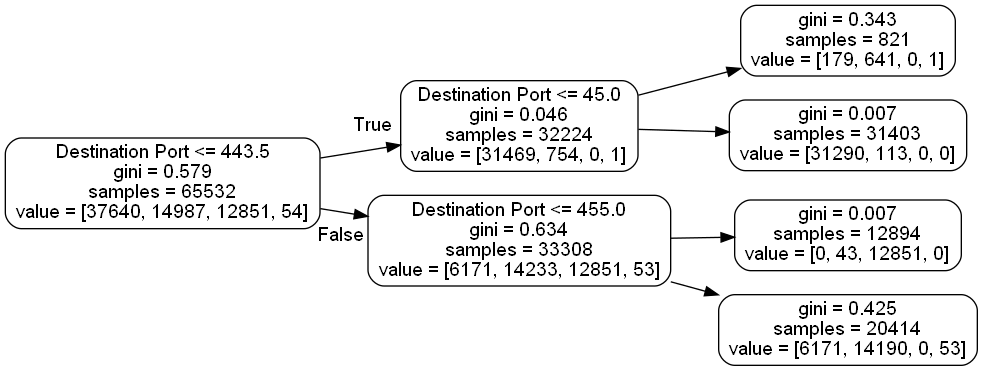

In [133]:
import graphviz
from IPython.display import Image  
from six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(db_tree, out_file=dot_data,  
        feature_names=X.columns, rounded=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())   

In [139]:
import sklearn
import numpy as np
from sklearn.cluster import KMeans
# The following are libraries that allow us to scale the
# data automatically.
from sklearn.preprocessing import scale, StandardScaler

In [142]:
#Cluster analysis requires us to scale the data to eliminate scaling effects
# in our results
tmp = fwdf[['Source Port', 'Destination Port']].copy()
scaler = StandardScaler()

scaler.fit(tmp)
scaled_array = scaler.transform(tmp) # returns np array, not dataframe

print(tmp.describe())


average = np.mean(scaled_array[:,0])
std = np.std(scaled_array[:,0])
print('\nSource Port mean is {:.6f}.'.format(average))
print('Source Port std is {:.6f}.'.format(std))
print('Destination Port mean is {:.6f}.'.format(np.mean(scaled_array[:,1])))
print('Destination Port standard deviation is {:.6f}.'.\
      format(np.std(scaled_array[:,1])))

        Source Port  Destination Port
count  65532.000000      65532.000000
mean   49391.969343      10577.385812
std    15255.712537      18466.027039
min        0.000000          0.000000
25%    49183.000000         80.000000
50%    53776.500000        445.000000
75%    58638.000000      15000.000000
max    65534.000000      65535.000000

Source Port mean is 0.000000.
Source Port std is 1.000000.
Destination Port mean is 0.000000.
Destination Port standard deviation is 1.000000.


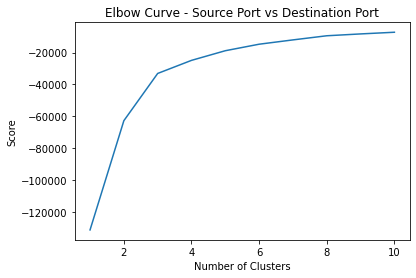

In [143]:
# df = scaled_array
max_clusters = 10 # max number of cluster to display in elbow curve

noClusters = range(1, max_clusters + 1)
kmeans = [KMeans(n_clusters = i) for i in noClusters] 
score = [kmeans[i].fit(scaled_array).score(scaled_array) for i in range(len(kmeans))]
plt.plot(noClusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel("Score")
plt.title('Elbow Curve - Source Port vs Destination Port')
plt.show()

In [144]:
kmeans = KMeans(n_clusters = 3, \
            random_state = 42) # <-- use this number to get my result
kmeans = kmeans.fit(scaled_array) 
unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
print(unscaled)

[[54606.97297071  1096.87700624]
 [52612.67375671 42756.36209865]
 [14009.48128073 27565.12441699]]


In [145]:
centroids = pd.DataFrame({'centroidx':unscaled[:,0],\
            'centroidy':unscaled[:,1]})
print(centroids)

      centroidx     centroidy
0  54606.972971   1096.877006
1  52612.673757  42756.362099
2  14009.481281  27565.124417


   Source Port  Destination Port  label
0        57222                53      0
1        56258              3389      0
2         6881             50321      2
3        50553              3389      0
4        50002               443      0


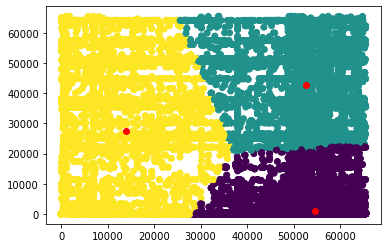

In [146]:
# print(kmeans.labels_.astype(np.int))
tmp['label'] = kmeans.labels_.astype(np.int) # kmeans label_ generates the cluster numbers
print(tmp.head()) # look to see which cluster each row is assigned to

plt.scatter(tmp['Source Port'], tmp['Destination Port'], c=tmp.label) # (x,y,color) 
plt.scatter(centroids['centroidx'], \
            centroids['centroidy'], c='red') # (x,y,color)

plt.show()

In [147]:
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()
print ("Features: ", wine.feature_names)
print ("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [148]:
print(fwdf.columns)
fwdf.shape
# wine.data.shape

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received', 'classenc'],
      dtype='object')


(65532, 13)

In [149]:
print(fwdf.head())
temp = fwdf[['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received', 'classenc']].copy()
# print (wine.data[0:5])

   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   3327        1438            1889       15                  17   
4  allow  25358        6778           18580       31                  16   

   pkts_sent  pkts_received  classenc  
0          1              1         0  
1         10

In [150]:
print(temp.classenc)
# print (wine.target)

0        0
1        0
2        0
3        0
4        0
        ..
65527    0
65528    0
65529    2
65530    2
65531    2
Name: classenc, Length: 65532, dtype: int32


In [151]:
# reminder: random_state will ensure you get the same results
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(temp[['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Elapsed Time (sec)']], temp['classenc'], test_size=0.3,random_state=109) # 70% training and 30% test

In [152]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
print ("{}+{}".format(X_test,y_pred))

       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
33602        57914               443            43452                   443   
56633        49728               443            15564                   443   
959          55498               445                0                     0   
41362        27783             57470                0                     0   
15517        49562                53            28687                    53   
...            ...               ...              ...                   ...   
20478        56625                53            47756                    53   
41893        35644                53             9492                    53   
48021        41439               443            30443                   443   
14159        64097               445                0                     0   
55289        34539                80            34539                    80   

       Elapsed Time (sec)  
33602                 1

In [153]:
print("Classes:{}".format(gnb.classes_))
print("Class count:{}".format(gnb.class_count_))
print("Class Prior:{}".format(gnb.class_prior_))
print("Class Prior:{}".format(gnb.predict_log_proba))

Classes:[0 1 2 3]
Class count:[26354. 10569.  8909.    40.]
Class Prior:[0.57451168 0.23040199 0.19421434 0.00087199]
Class Prior:<bound method _BaseNB.predict_log_proba of GaussianNB()>


In [154]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9971007121057985


In [156]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11251,    25,     0,    10],
       [    2,  4408,     8,     0],
       [    0,     0,  3942,     0],
       [    2,    10,     0,     2]], dtype=int64)

In [157]:
fw = pd.read_csv('C:\\Users\\siva_\\Documents\\MISY630\\Research Project\\Examples\\log.csv')
print(fw.shape)
print(fw.dropna().shape)
print(temp['classenc'].value_counts()/sum(temp['classenc'].value_counts())*100)
fw['classenc'].value_counts()/sum(fw['classenc'].value_counts())*100

(11, 12)
(11, 12)
0    57.437588
1    22.869743
2    19.610267
3     0.082402
Name: classenc, dtype: float64


2    36.363636
1    27.272727
0    27.272727
3     9.090909
Name: classenc, dtype: float64

In [158]:
print(fw.head())
ftmp = fw[['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received', 'classenc']].copy()
# print (wine.data[0:5])

   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        63842             45682            31353                 45682   
1        60430               443            49199                   443   
2        59878               443            30562                   443   
3        57131              8055                0                     0   
4        45855             25174                0                     0   

   classenc    Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0         0  4687209     3850148          837061     4974                 107   
1         0     5696        1143            4553       23                 119   
2         0     3864        2812            1052       17                 112   
3         1      145         145               0        1                   0   
4         1       62          62               0        1                   0   

   pkts_sent  pkts_received  
0       3004           1970  
1 

In [159]:
# reminder: random_state will ensure you get the same results
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(ftmp[['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Elapsed Time (sec)']], ftmp['classenc'], test_size=9,random_state=109) # 70% training and 30% test

In [160]:
print(X_test)
y_pred = gnb.predict(X_test)
print(y_pred)


    Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
7         51045               445                0                     0   
4         45855             25174                0                     0   
2         59878               443            30562                   443   
10         1024             21854                0                     0   
1         60430               443            49199                   443   
3         57131              8055                0                     0   
0         63842             45682            31353                 45682   
8         55725               445                0                     0   
9         55723               445                0                     0   

    Elapsed Time (sec)  
7                    0  
4                    0  
2                  112  
10                   0  
1                  119  
3                    0  
0                  107  
8                    0  
9             

In [161]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


In [163]:
confusion_matrix(y_test, y_pred)

array([[3, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 1, 0, 0]], dtype=int64)